In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
# pre-loaded chunk of traffic
# you can get all data from DataBase easily
df = pd.read_csv("data_chunk.csv")
df

,meta1,id,meta2,vector,meta3,meta6,meta4,meta5
0,REQUEST_ARGS,b147cf91e3f220c070f9d7aed65fa6b6,room-type,5257{${print(chr(49).chr(55).chr(73).chr(53).c...,200,77.221.130.13,401,{${print(chr(49).chr(55).chr(73).chr(53).chr(5...
1,REQUEST_PATH,8965845630b7becb6029dd68f84ca59c,REQUEST_PATH,/mail/tll/eaotaht.nsf/($Inbox)/FF02CBCEE47E0DD...,200,146.255.182.16,1318,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_1 like...
2,REQUEST_JSON,8d211f8d38f78e64c5699acf5f6d01b9,pageY,-98,200,62.33.168.30,960,Mozilla/5.0 (Windows NT 5.1; rv:52.0) Gecko/20...
3,REQUEST_GET_ARGS,eafa80c4d8a7f369a4f04295a8c8b3e2,REQUEST_GET_ARGS._,912013373,404,109.172.30.185,601,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
4,REQUEST_METHOD\';\'REQUEST_HEADE,ae5aec9a6514b01f11fb3d9f2cf7701f,X-Requested-With\';\'CSRF_TOKEN,POST\';\'XMLHttpRequest\';\'14f2e70b072e12f42c...,403,212.33.244.15,1191,Mozilla/5.0 (Windows NT 5.1; rv:52.0) Gecko/20...
...,...,...,...,...,...,...,...,...
493,REQUEST_POST_ARGS,50012828c9111a20a4a66edc7016e557,REQUEST_POST_ARGS.rid,3543169957,200,37.46.129.136,691,User-Agent: Mozilla/5.0 (Windows NT 10.0; WOW6...
494,REQUEST_GET_ARGS,eb6cc7fe91e83e26abb634ebb8b92472,backurl,/news/tags/ãîñóäàðñòâåííàÿ áåçîïàñíîñòü/?tags=...,200,5.45.207.38,592,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
495,REQUEST_HEADERS,146fc6421a8afde13e58e6f1b7953fa4,Referer,file://localhost/mtd_down/widgets/user/nStream...,200,62.227.54.192,563,Mozilla/5.0 (Windows; U; en-US; rv:1.8.1.11; G...
496,REQUEST_ARGS,4aa28433ddcd5cf24b736ae01437a398,m,201404&quot;|ls &quot;-la,200,46.148.48.24,121,&quot;|ls &quot;-la


In [70]:
# Nan is presented in some columns
df.count()

meta1                  498
id                     498
meta2                  381
vector                 498
meta3                  498
meta6                  498
meta4                  498
meta5                  494
text                   378
is_header_corrupted    498
http_code              498
dtype: int64

### Columns and it's meaning

In [19]:
df.meta1.value_counts()

REQUEST_ARGS                        116
REQUEST_GET_ARGS                     96
REQUEST_POST_ARGS                    74
REQUEST_HEADERS                      42
REQUEST_COOKIES                      32
REQUEST_PATH                         29
REQUEST_URI                          26
REQUEST_METHOD\';\'REQUEST_CONTE     19
REQUEST_ARGS_KEYS                    18
CLIENT_USERAGENT                     12
CLIENT_SESSION_ID                    11
REQUEST_METHOD\';\'REQUEST_HEADE      6
RESPONSE_HEADERS                      4
REQUEST_XML                           4
REQUEST_JSON                          3
REQUEST_URI\';\'REQUEST_ARGS          3
RESPONSE_BODY                         3
Name: meta1, dtype: int64

It seems that `meta1` is a request type, but rarely it can be corrupted (on purpose may be?)

In [20]:
df.meta2.value_counts()[:10]

REQUEST_GET_ARGS._                 30
pwd                                28
action                             19
url                                18
reference to                       14
anj                                12
User-Agent                         10
Referer                             9
a                                   8
X-Requested-With\';\'CSRF_TOKEN     8
Name: meta2, dtype: int64

Nothing comes to my mind, probably some meta information about request (connected with `meta1` I guess)

In [21]:
df.meta3.value_counts()[:10]

200    276
404     93
302     44
301     19
502     14
403     13
405     12
504      6
304      6
400      5
Name: meta3, dtype: int64

`meta3` is http-code response I believe.

In [22]:
df.meta4.describe()

count       498.000000
mean       4565.520080
std       25147.388104
min          74.000000
25%         402.250000
50%         613.000000
75%        1054.500000
max      446211.000000
Name: meta4, dtype: float64

In [23]:
df.loc[df.meta4.argmax()]

meta1                                          REQUEST_ARGS
id                         8bcae893f25d2e7e0e98fee2eb801f38
meta2                                          add_file_cat
vector                          ../upload/file/gazeta/2015/
meta3                                                   200
meta6                                         188.227.49.12
meta4                                                446211
meta5     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: 143, dtype: object

I can't get the meaning of this column.

In [29]:
df.meta5.head()

0    {${print(chr(49).chr(55).chr(73).chr(53).chr(5...
1    Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_1 like...
2    Mozilla/5.0 (Windows NT 5.1; rv:52.0) Gecko/20...
3    Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
4    Mozilla/5.0 (Windows NT 5.1; rv:52.0) Gecko/20...
Name: meta5, dtype: object

`meta5` is mostly user info, but sometimes we have injections here (first row).

In [31]:
df.meta6.head()

0     77.221.130.13
1    146.255.182.16
2      62.33.168.30
3    109.172.30.185
4     212.33.244.15
Name: meta6, dtype: object

`meta6` - IP of the user.

Summation:

1. `meta1` can be used as a feature on pattern matching base. If `meta1` is like `REQUEST_[A-Z]`, then it's non-corrupted. Otherwise it can mark some injections.

2. I don't see much special information given by `meta2`, but in can be concatenated to `vector` along with `meta5`.

3. `meta3` can be useful, due to server can detect injected queries by itself, but it needs to be tested.

4. `meta4` is a mistery for me.

5. User IP (`meta6`) can be informative, but only as geographical mark (or, if we would form IP balcklist).

### Feature engineering

Lets remove requests with "corrupted" `meta1` and `meta5`, and vectorize it.

In [152]:
request_header_pattern = "REQUEST(\_[A-Z]+)+"
browsers_pattern = "(" + "|".join(["(mozilla)", "(chrome)", "(safari)"]) + ")"

#df[(df.meta1.str.fullmatch()) & (df.meta5.str.contains("|"))]
# remove all nans
df = df.dropna()
df[(df.meta1.str.fullmatch(request_header_pattern)) & (~df.meta5.str.contains(browsers_pattern, case=False, regex=True))]

C:\Users\Joseph\AppData\Local\Temp/ipykernel_3140/806187193.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df[(df.meta1.str.fullmatch(request_header_pattern)) & (~df.meta5.str.contains(browsers_pattern, case=False, regex=True))]


,meta1,id,meta2,vector,meta3,meta6,meta4,meta5
0,REQUEST_ARGS,b147cf91e3f220c070f9d7aed65fa6b6,room-type,5257{${print(chr(49).chr(55).chr(73).chr(53).c...,200,77.221.130.13,401,{${print(chr(49).chr(55).chr(73).chr(53).chr(5...
11,REQUEST_ARGS,53bf3b744639104764352e53049714cb,module,"custompage"");ls -la;factor 228000;/*",200,46.175.253.135,195,""");ls -la;factor 228000;/*"
15,REQUEST_ARGS,82e6da59f81a3d418ab39c470e0cd331,manufactur,999000224|${ls -la;factor 228000},200,77.221.130.13,184,|${ls -la;factor 228000}
22,REQUEST_ARGS,8d7a070e462b93a9f73efc562bb6ccee,author,11'{${print(chr(49).chr(55).chr(73).chr(53).ch...,200,109.194.227.26,324,'{${print(chr(49).chr(55).chr(73).chr(53).chr(...
33,REQUEST_XML,779db5da6291c9ba5e290127a02018ee,REQUEST_XML./s:Envelope/s:Body/DeviceMetadataB...,DOID:USBSTOR\\DiskTOSHIBA_STOR.E_EDITION__,200,217.175.140.69,2399,MICROSOFT_DEVICE_METADATA_RETRIEVAL_CLIENT
...,...,...,...,...,...,...,...,...
466,REQUEST_GET_ARGS,3eb5cce13e8a9895ea042d70666ae11a,action,"rsd UNION ALL SELECT NULL,NULL,NULL,NULL,NULL,...",403,185.92.73.109,473,Opera/9.62 (Windows NT 6.0; U; nb) Presto/2.1.1
473,REQUEST_HEADERS,7d483d042b3e6f8c5e5b67d902baf6f5,Authorization,"SP Digest username=\""%D1%81%D0%B2%D0%B8%D1%81%...",401,188.170.195.24,270,Android
474,REQUEST_ARGS,401119ab5f96ec119bf1cf92e24c95ac,path,file:///storage/emulated/0/Android/data/ru.spi...,200,93.170.21.99,307,Apache-HttpClient/UNAVAILABLE (java 1.4)
483,REQUEST_ARGS,b404c766439fd5fbae73112f93452b03,q,"ru""];ls -la;factor 228000;/*",404,46.148.48.24,133,"""];ls -la;factor 228000;/*"


##### Vectorization

Straigt forward TF-IDF vectorization cannot be performed. We have to tokenize text by hand first, due to non-natural language data type.

In [213]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Strainght forward soltion
text = df["vector"]
X = TfidfVectorizer(max_features=500, strip_accents="ascii",norm="l1").fit_transform(text)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
df["cluster"] = kmeans.predict(X)
df[["vector", "cluster"]]

,vector,cluster
0,5257{${print(chr(49).chr(55).chr(73).chr(53).c...,1
1,/mail/tll/eaotaht.nsf/($Inbox)/FF02CBCEE47E0DD...,0
2,-98,0
3,912013373,0
4,POST\';\'XMLHttpRequest\';\'14f2e70b072e12f42c...,0
...,...,...
493,3543169957,0
494,/news/tags/ãîñóäàðñòâåííàÿ áåçîïàñíîñòü/?tags=...,0
495,file://localhost/mtd_down/widgets/user/nStream...,0
496,201404&quot;|ls &quot;-la,0


In [214]:
df.groupby("cluster")["vector"].count()

cluster
0    363
1     15
Name: vector, dtype: int64

In [215]:
df.query("cluster == 0")["vector"].values[:10]

array(['/mail/tll/eaotaht.nsf/($Inbox)/FF02CBCEE47E0DD080258226004EBC1A/',
       '-98', '912013373',
       "POST\\';\\'XMLHttpRequest\\';\\'14f2e70b072e12f42ca4421570deb577812ff61eacd5da8de266337010fd64447645eb039a4aaaa5",
       '311464954',
       'wqT_3QLNBvBCTQMAAAMA1gAFAQirm8zTBRDhz4eSqejfxh0YrNSAu86QwqksKjYJcD0K16NwzT8RcT0K16NwzT8ZAAAAgD0KIEAhcQ0SBClxDQnIMQAAAGBmZuY_MNiT2wE4mAJAmRRIAlCsn_UmWImyGGAAaKGxOHin1QSAAQGKAQNVU0SSBQbwXpgBrAKgAdgEqAEBsAEAuAEBwAEFyAEC0AEA2AEA4AEA8AEA-gEJTVNOUlVSVTExigI7dWYoJ2EnLCAyMTc0MDUzLCAxNTE3NDg5NTc5KTt1ZigncicsIDgxNjEyNzE2Nh4A8IeSAvUBIUxqTUZ2d2lFZzRVSkVLeWY5U1lZQUNDSnNoZ3dBRGdBUUFCSW1SUlEySlBiQVZnQVlEeG9BSEJXZUJTQUFjQUJpQUVVa0FFQm1BRUJvQUVCcUFFRHNBRUF1UUZndUFfSnBIRE5QOEVCWUxnUHlhUnd6VF9KQVFBQUFBQUFBUEFfMlFFCQxoQUR3UC1BQkFQVUJINFZyUHBnQ0FLQUNBTFVDBSEETDAJCPBMTUFDQU1nQ0FPQUNBT2dDQVBnQ0FJQURBWkFEQUpnREFhZ0RoSU9GQ2JvREVXUmxabUYxYkhRalJsSkJNVG96T1RFepoCOSFMZ3RzNWc2-AD0KAFpYklZSUFBb0FEb1JaR1ZtWVhWc2RDTkdVa0V4T2pNNU1UTS6yAiAxNTE2RThGRjY4MUE2NEMyMUM5Q0UzNzg

In [216]:
df.query("cluster == 1")["vector"].values[:10]

array(['5257{${print(chr(49).chr(55).chr(73).chr(53).chr(51).chr(48).chr(86).chr(65).chr(117).chr(52))}}',
       "11'{${print(chr(49).chr(55).chr(73).chr(53).chr(51).chr(48).chr(86).chr(65).chr(117).chr(52))}}'",
       'salut4|{${print(chr(49).chr(55).chr(73).chr(53).chr(51).chr(48).chr(86).chr(65).chr(117).chr(52))}}',
       'account/newsletter|{${print(chr(49).chr(55).chr(73).chr(53).chr(51).chr(48).chr(86).chr(65).chr(117).chr(52))}}',
       "999007249'{${print(chr(49).chr(55).chr(73).chr(53).chr(51).chr(48).chr(86).chr(65).chr(117).chr(52))}}'",
       'shop.browse|{${print(chr(49).chr(55).chr(73).chr(53).chr(51).chr(48).chr(86).chr(65).chr(117).chr(52))}}',
       'Armand Basi|{${print(chr(49).chr(55).chr(73).chr(53).chr(51).chr(48).chr(86).chr(65).chr(117).chr(52))}}',
       '2565{${print(chr(49).chr(55).chr(73).chr(53).chr(51).chr(48).chr(86).chr(65).chr(117).chr(52))}}',
       '3|{${print(chr(49).chr(55).chr(73).chr(53).chr(51).chr(48).chr(86).chr(65).chr(117).chr(52))}}'

Broot force solution summation:

Other clustering algorithms must be tested.

Some inejctions (ex. SQL) can looks like natural language.

In [324]:
# Add new features to increase separability

df["special_symbols_count"] = df.vector.str.count("[^0-9a-zA-Z]").values.reshape(-1, 1)
df["numeric_symbols_count"] = df.vector.str.count("[0-9]")
df[["vector", "special_symbols_count", "numeric_symbols_count"]].head(10)

,vector,special_symbols_count,numeric_symbols_count
0,5257{${print(chr(49).chr(55).chr(73).chr(53).c...,36,25
1,/mail/tll/eaotaht.nsf/($Inbox)/FF02CBCEE47E0DD...,10,18
2,-98,1,2
3,912013373,0,9
4,POST\';\'XMLHttpRequest\';\'14f2e70b072e12f42c...,10,51
8,311464954,0,9
9,wqT_3QLNBvBCTQMAAAMA1gAFAQirm8zTBRDhz4eSqejfxh...,5,107
11,"custompage"");ls -la;factor 228000;/*",10,6
13,dTM7k!M4/K@/9KT:5HM7EvosfG:I_-V`rKROz0sxr!I`Jr...,267,134
14,Mozilla/5.00 (Nikto/2.1.6) (Evasions:None) (Te...,16,12


In [325]:
import numpy as np


def min_max_scaling(x):
    return (x - x.min()) / (x.max() - x.min())


def filter_string(s):
    return ' '.join([word for word in s.split() if len(word) >= 3])


cleaned_text = text.str.replace(f"[^a-zA-Z]+", " ",regex=True).apply(filter_string).str.lower()
X = TfidfVectorizer(max_features=500, strip_accents="ascii",norm="l1").fit_transform(cleaned_text)
X_with_new_features = np.hstack([
    X.toarray(),
    df["numeric_symbols_count"].values.reshape(-1, 1),
    df["special_symbols_count"].values.reshape(-1, 1)
])
X_with_new_features[:, -2] = min_max_scaling(X_with_new_features[:, -2])
X_with_new_features[:, -1] = min_max_scaling(X_with_new_features[:, -1])

In [335]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_with_new_features)
df["cluster"] = kmeans.predict(X_with_new_features)
df[["vector", "cluster"]]

,vector,cluster
0,5257{${print(chr(49).chr(55).chr(73).chr(53).c...,1
1,/mail/tll/eaotaht.nsf/($Inbox)/FF02CBCEE47E0DD...,1
2,-98,1
3,912013373,1
4,POST\';\'XMLHttpRequest\';\'14f2e70b072e12f42c...,1
...,...,...
493,3543169957,1
494,/news/tags/ãîñóäàðñòâåííàÿ áåçîïàñíîñòü/?tags=...,1
495,file://localhost/mtd_down/widgets/user/nStream...,1
496,201404&quot;|ls &quot;-la,1


In [336]:
df.groupby("cluster")["vector"].count()

cluster
0     39
1    339
Name: vector, dtype: int64

In [337]:
df.query("cluster == 0")["vector"].values[:10]

array(['http://www.selva.com/', 'http://9pvtlq6j.b.wlrm.tl/a.dtd',
       'http://stzr6wea.b.wlrm.tl/a.dtd',
       'WordPress/4.6.1; http://fishing.ahtubinsk.ru',
       'http://uh9svjen.a.wlrm.tl/b.ent',
       'http://f2eqy5n4.b.wlrm.tl/b.ent',
       'http://wmipqmwt.a.wlrm.tl/a.dtd',
       'http://i3l6in0c.b.wlrm.tl/a.dtd',
       'http://n9uqsfai.b.wlrm.tl/a.dtd',
       'http://zbjvju54.a.wlrm.tl/a.dtd'], dtype=object)

In [338]:
df.query("cluster == 1")["vector"].values[:10]

array(['5257{${print(chr(49).chr(55).chr(73).chr(53).chr(51).chr(48).chr(86).chr(65).chr(117).chr(52))}}',
       '/mail/tll/eaotaht.nsf/($Inbox)/FF02CBCEE47E0DD080258226004EBC1A/',
       '-98', '912013373',
       "POST\\';\\'XMLHttpRequest\\';\\'14f2e70b072e12f42ca4421570deb577812ff61eacd5da8de266337010fd64447645eb039a4aaaa5",
       '311464954',
       'wqT_3QLNBvBCTQMAAAMA1gAFAQirm8zTBRDhz4eSqejfxh0YrNSAu86QwqksKjYJcD0K16NwzT8RcT0K16NwzT8ZAAAAgD0KIEAhcQ0SBClxDQnIMQAAAGBmZuY_MNiT2wE4mAJAmRRIAlCsn_UmWImyGGAAaKGxOHin1QSAAQGKAQNVU0SSBQbwXpgBrAKgAdgEqAEBsAEAuAEBwAEFyAEC0AEA2AEA4AEA8AEA-gEJTVNOUlVSVTExigI7dWYoJ2EnLCAyMTc0MDUzLCAxNTE3NDg5NTc5KTt1ZigncicsIDgxNjEyNzE2Nh4A8IeSAvUBIUxqTUZ2d2lFZzRVSkVLeWY5U1lZQUNDSnNoZ3dBRGdBUUFCSW1SUlEySlBiQVZnQVlEeG9BSEJXZUJTQUFjQUJpQUVVa0FFQm1BRUJvQUVCcUFFRHNBRUF1UUZndUFfSnBIRE5QOEVCWUxnUHlhUnd6VF9KQVFBQUFBQUFBUEFfMlFFCQxoQUR3UC1BQkFQVUJINFZyUHBnQ0FLQUNBTFVDBSEETDAJCPBMTUFDQU1nQ0FPQUNBT2dDQVBnQ0FJQURBWkFEQUpnREFhZ0RoSU9GQ2JvREVXUmxabUYxYkhRalJsSkJNVG96T1RF

[0.10209568 0.07247595]


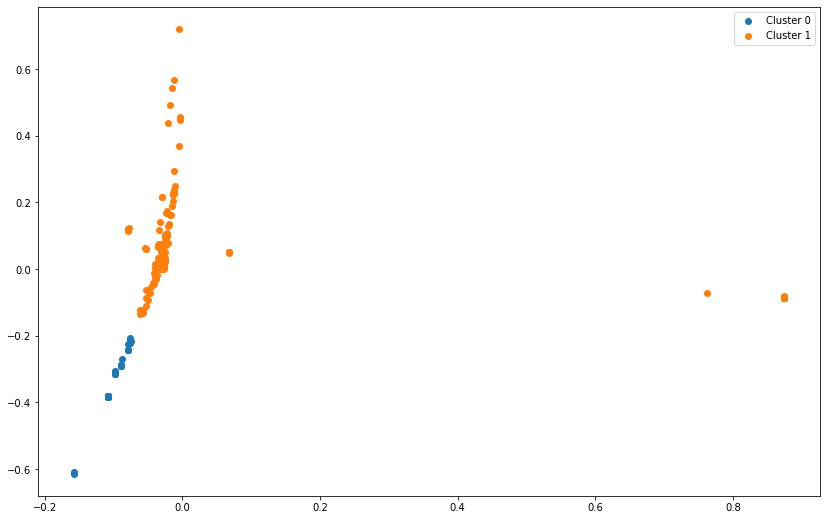

In [340]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X_with_new_features)
df["pca_x"], df["pca_y"] = pca.transform(X_with_new_features).T

print(pca.explained_variance_ratio_)
f, ax = plt.subplots(1, 1, figsize=(14, 9))
for cluster, one_cluster_data in df.groupby("cluster"):
    ax.scatter(one_cluster_data["pca_x"], one_cluster_data["pca_y"], label=f"Cluster {cluster}")
ax.legend()
plt.show()

## Conclusion

1. I need to improve my knowledge about existing injection algorithms

2. Brootforce solution won't work due to non-pure NLP task origin